<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week3.do.txt --no_mako --no_abort -->
<!-- dom:TITLE: Week 5 January 31-February 4: Metropolis Algoritm and Markov Chains, Importance Sampling, Fokker-Planck and Langevin equations -->

# Week 5 January 31-February 4: Metropolis Algoritm and Markov Chains, Importance Sampling, Fokker-Planck and Langevin equations
**Morten Hjorth-Jensen  Email morten.hjorth-jensen@fys.uio.no**, Department of Physics and Center fo Computing in Science Education, University of Oslo, Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Ion Beams, Michigan State University, East Lansing, Michigan, USA

Date: **Feb 2, 2022**

Copyright 1999-2022, Morten Hjorth-Jensen  Email morten.hjorth-jensen@fys.uio.no. Released under CC Attribution-NonCommercial 4.0 license

## Overview of week 5, January 31-February 4
**Topics.**

* Markov Chain Monte Carlo

* Metropolis-Hastings sampling and Importance Sampling

* Fokker-Planck and Langevin equations

**Teaching Material, videos and written material.**

* Overview video on [Metropolis algoritm](https://www.youtube.com/watch?v=h1NOS_wxgGg&ab_channel=JeffPicton)

* Lecture notes here.

* See also [Lectures from FYS3150/4150 on the Metropolis Algorithm](http://compphysics.github.io/ComputationalPhysics/doc/pub/rw/html/rw-bs.html)

## Basics of the Metropolis Algorithm

The Metropolis et al.
algorithm was invented by Metropolis et. a
and is often simply called the Metropolis algorithm.
It is a method to sample a normalized probability
distribution by a stochastic process. We define ${\cal P}_i^{(n)}$ to
be the probability for finding the system in the state $i$ at step $n$.
The algorithm is then

## The basic of the Metropolis Algorithm

* Sample a possible new state $j$ with some probability $T_{i\rightarrow j}$.

* Accept the new state $j$ with probability $A_{i \rightarrow j}$ and use it as the next sample.

* With probability $1-A_{i\rightarrow j}$ the move is rejected and the original state $i$ is used again as a sample.

We wish to derive the required properties of $T$ and $A$ such that
${\cal P}_i^{(n\rightarrow \infty)} \rightarrow p_i$ so that starting
from any distribution, the method converges to the correct distribution.
Note that the description here is for a discrete probability distribution.
Replacing probabilities $p_i$ with expressions like $p(x_i)dx_i$ will
take all of these over to the corresponding continuum expressions.

## More on the Metropolis

The dynamical equation for ${\cal P}_i^{(n)}$ can be written directly from
the description above. The probability of being in the state $i$ at step $n$
is given by the probability of being in any state $j$ at the previous step,
and making an accepted transition to $i$ added to the probability of
being in the state $i$, making a transition to any state $j$ and
rejecting the move:

<!-- Equation labels as ordinary links -->
<div id="eq:eq1"></div>

$$
\begin{equation}
\label{eq:eq1} \tag{1}
{\cal P}^{(n)}_i = \sum_j \left [
{\cal P}^{(n-1)}_jT_{j\rightarrow i} A_{j\rightarrow i} 
+{\cal P}^{(n-1)}_iT_{i\rightarrow j}\left ( 1- A_{i\rightarrow j} \right)
\right ] \,.
\end{equation}
$$

## Metropolis algorithm, setting it up
Since the probability of making some transition must be 1,
$\sum_j T_{i\rightarrow j} = 1$, and Eq. ([1](#eq:eq1)) becomes

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
{\cal P}^{(n)}_i = {\cal P}^{(n-1)}_i +
 \sum_j \left [
{\cal P}^{(n-1)}_jT_{j\rightarrow i} A_{j\rightarrow i} 
-{\cal P}^{(n-1)}_iT_{i\rightarrow j}A_{i\rightarrow j}
\right ] \,.
\label{_auto1} \tag{2}
\end{equation}
$$

## Metropolis continues

For large $n$ we require that ${\cal P}^{(n\rightarrow \infty)}_i = p_i$,
the desired probability distribution. Taking this limit, gives the
balance requirement

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
\sum_j \left [p_jT_{j\rightarrow i} A_{j\rightarrow i}-p_iT_{i\rightarrow j}A_{i\rightarrow j}
\right ] = 0,
\label{_auto2} \tag{3}
\end{equation}
$$

## Detailed Balance

The balance requirement is very weak. Typically the much stronger detailed
balance requirement is enforced, that is rather than the sum being
set to zero, we set each term separately to zero and use this
to determine the acceptance probabilities. Rearranging, the result is

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\frac{ A_{j\rightarrow i}}{A_{i\rightarrow j}}
= \frac{p_iT_{i\rightarrow j}}{ p_jT_{j\rightarrow i}} \,.
\label{_auto3} \tag{4}
\end{equation}
$$

## More on Detailed Balance

The Metropolis choice is to maximize the $A$ values, that is

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
A_{j \rightarrow i} = \min \left ( 1,
\frac{p_iT_{i\rightarrow j}}{ p_jT_{j\rightarrow i}}\right ).
\label{_auto4} \tag{5}
\end{equation}
$$

Other choices are possible, but they all correspond to multilplying
$A_{i\rightarrow j}$ and $A_{j\rightarrow i}$ by the same constant
smaller than unity.\footnote{The penalty function method uses just such
a factor to compensate for $p_i$ that are evaluated stochastically
and are therefore noisy.}

Having chosen the acceptance probabilities, we have guaranteed that
if the  ${\cal P}_i^{(n)}$ has equilibrated, that is if it is equal to $p_i$,
it will remain equilibrated. Next we need to find the circumstances for
convergence to equilibrium.

## Dynamical Equation

The dynamical equation can be written as

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
{\cal P}^{(n)}_i = \sum_j M_{ij}{\cal P}^{(n-1)}_j
\label{_auto5} \tag{6}
\end{equation}
$$

with the matrix $M$ given by

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
M_{ij} = \delta_{ij}\left [ 1 -\sum_k T_{i\rightarrow k} A_{i \rightarrow k}
\right ] + T_{j\rightarrow i} A_{j\rightarrow i} \,.
\label{_auto6} \tag{7}
\end{equation}
$$

Summing over $i$ shows that $\sum_i M_{ij} = 1$, and since
$\sum_k T_{i\rightarrow k} = 1$, and $A_{i \rightarrow k} \leq 1$, the
elements of the matrix satisfy $M_{ij} \geq 0$. The matrix $M$ is therefore
a stochastic matrix.

## Interpreting the Metropolis Algorithm

The Metropolis method is simply the power method for computing the
right eigenvector of $M$ with the largest magnitude eigenvalue.
By construction, the correct probability distribution is a right eigenvector
with eigenvalue 1. Therefore, for the Metropolis method to converge
to this result, we must show that $M$ has only one eigenvalue with this
magnitude, and all other eigenvalues are smaller.

Even a defective matrix has at least one left and right eigenvector for
each eigenvalue. An example of a defective matrix is

$$
\begin{bmatrix}
0 & 1\\
0 & 0 \\
\end{bmatrix},
$$

with two zero eigenvalues, only one right eigenvector

$$
\begin{bmatrix}
1 \\
0\\
\end{bmatrix}
$$

and only one left eigenvector $(0\ 1)$.

## Gershgorin bounds and Metropolis

The Gershgorin bounds for the eigenvalues can be derived by multiplying on
the left with the eigenvector with the maximum and minimum eigenvalues,

$$
\sum_i \psi^{\rm max}_i M_{ij} = \lambda_{\rm max}  \psi^{\rm max}_j
\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation} 
\sum_i \psi^{\rm min}_i M_{ij} = \lambda_{\rm min}  \psi^{\rm min}_j
\label{_auto7} \tag{8}
\end{equation}
$$

## Normalizing the Eigenvectors

Next we choose the normalization of these eigenvectors so that the
largest element (or one of the equally largest elements)
has value 1. Let's call this element $k$, and
we can therefore bound the magnitude of the other elements to be less
than or equal to 1.
This leads to the inequalities, using the property that $M_{ij}\geq 0$,

$$
\begin{eqnarray}
\sum_i M_{ik} \leq \lambda_{\rm max}
\nonumber\\
M_{kk}-\sum_{i \neq k} M_{ik} \geq \lambda_{\rm min}
\end{eqnarray}
$$

where the equality from the maximum
will occur only if the eigenvector takes the value 1 for all values of
$i$ where $M_{ik} \neq 0$, and the equality for the minimum will
occur only if the eigenvector takes the value -1 for all values of $i\neq k$
where $M_{ik} \neq 0$.

## More Metropolis analysis

That the maximum eigenvalue is 1 follows immediately from the property
that $\sum_i M_{ik} = 1$. Similarly the minimum eigenvalue can be -1,
but only if $M_{kk} = 0$ and the magnitude of all the other elements
$\psi_i^{\rm min}$ of
the eigenvector that multiply nonzero elements $M_{ik}$ are -1.

Let's first see what the properties of $M$ must be
to eliminate any -1 eigenvalues. 
To have a -1 eigenvalue, the left eigenvector must contain only $\pm 1$
and $0$ values. Taking in turn each $\pm 1$ value as the maximum, so that
it corresponds to the index $k$, the nonzero $M_{ik}$ values must
correspond to $i$ index values of the eigenvector which have opposite
sign elements. That is, the $M$ matrix must break up into sets of
states that always make transitions from set A to set B ... back to set A.
In particular, there can be no rejections of these moves in the cycle
since the -1 eigenvalue requires $M_{kk}=0$. To guarantee no eigenvalues
with eigenvalue -1, we simply have to make sure that there are no
cycles among states. Notice that this is generally trivial since such
cycles cannot have any rejections at any stage. An example of such
a cycle is sampling a noninteracting Ising spin. If the transition is
taken to flip the spin, and the energy difference is zero, the Boltzmann
factor will not change and the move will always be accepted. The system
will simply flip from up to down to up to down ad infinitum. Including
a rejection probability or using a heat bath algorithm
immediately fixes the problem.

## Final Considerations I

Next we need to make sure that there is only one left eigenvector
with eigenvalue 1. To get an eigenvalue 1, the left eigenvector must be 
constructed from only ones and zeroes. It is straightforward to
see that a vector made up of
ones and zeroes can only be an eigenvector with eigenvalue 1 if the 
matrix element $M_{ij} = 0$ for all cases where $\psi_i \neq \psi_j$.
That is we can choose an index $i$ and take $\psi_i = 1$.
We require all elements $\psi_j$ where $M_{ij} \neq 0$ to also have
the value $1$. Continuing we then require all elements $\psi_\ell$ $M_{j\ell}$
to have value $1$. Only if the matrix $M$ can be put into block diagonal
form can there be more than one choice for the left eigenvector with
eigenvalue 1. We therefore require that the transition matrix not
be in block diagonal form. This simply means that we must choose
the transition probability so that we can get from any allowed state
to any other in a series of transitions.

## Final Considerations II

Finally, we note that for a defective matrix, with more eigenvalues
than independent eigenvectors for eigenvalue 1,
the left and right
eigenvectors of eigenvalue 1 would be orthogonal.
Here the left eigenvector is all 1
except for states that can never be reached, and the right eigenvector
is $p_i > 0$ except for states that give zero probability. We already
require that we can reach
all states that contribute to $p_i$. Therefore the left and right
eigenvectors with eigenvalue 1 do not correspond to a defective sector
of the matrix and they are unique. The Metropolis algorithm therefore
converges exponentially to the desired distribution.

## Final Considerations III

The requirements for the transition $T_{i \rightarrow j}$ are
* A series of transitions must let us to get from any allowed state to any other by a finite series of transitions.

* The transitions cannot be grouped into sets of states, A, B, C ,... such that transitions from $A$ go to $B$, $B$ to $C$ etc and finally back to $A$. With condition (a) satisfied, this condition will always be satisfied if either $T_{i \rightarrow i} \neq 0$ or there are some rejected moves.

## Importance Sampling: Overview of what needs to be coded

For a diffusion process characterized by a time-dependent probability density $P(x,t)$ in one dimension the Fokker-Planck
equation reads (for one particle /walker)

$$
\frac{\partial P}{\partial t} = D\frac{\partial }{\partial x}\left(\frac{\partial }{\partial x} -F\right)P(x,t),
$$

where $F$ is a drift term and $D$ is the diffusion coefficient.

## Importance sampling
The new positions in coordinate space are given as the solutions of the Langevin equation using Euler's method, namely,
we go from the Langevin equation

$$
\frac{\partial x(t)}{\partial t} = DF(x(t)) +\eta,
$$

with $\eta$ a random variable,
yielding a new position

$$
y = x+DF(x)\Delta t +\xi\sqrt{\Delta t},
$$

where $\xi$ is gaussian random variable and $\Delta t$ is a chosen time step. 
The quantity $D$ is, in atomic units, equal to $1/2$ and comes from the factor $1/2$ in the kinetic energy operator. Note that $\Delta t$ is to be viewed as a parameter. Values of $\Delta t \in [0.001,0.01]$ yield in general rather stable values of the ground state energy.

## Importance sampling
The process of isotropic diffusion characterized by a time-dependent probability density $P(\mathbf{x},t)$ obeys (as an approximation) the so-called Fokker-Planck equation

$$
\frac{\partial P}{\partial t} = \sum_i D\frac{\partial }{\partial \mathbf{x_i}}\left(\frac{\partial }{\partial \mathbf{x_i}} -\mathbf{F_i}\right)P(\mathbf{x},t),
$$

where $\mathbf{F_i}$ is the $i^{th}$ component of the drift term (drift velocity) caused by an external potential, and $D$ is the diffusion coefficient. The convergence to a stationary probability density can be obtained by setting the left hand side to zero. The resulting equation will be satisfied if and only if all the terms of the sum are equal zero,

$$
\frac{\partial^2 P}{\partial {\mathbf{x_i}^2}} = P\frac{\partial}{\partial {\mathbf{x_i}}}\mathbf{F_i} + \mathbf{F_i}\frac{\partial}{\partial {\mathbf{x_i}}}P.
$$

## Importance sampling
The drift vector should be of the form $\mathbf{F} = g(\mathbf{x}) \frac{\partial P}{\partial \mathbf{x}}$. Then,

$$
\frac{\partial^2 P}{\partial {\mathbf{x_i}^2}} = P\frac{\partial g}{\partial P}\left( \frac{\partial P}{\partial {\mathbf{x}_i}}  \right)^2 + P g \frac{\partial ^2 P}{\partial {\mathbf{x}_i^2}}  + g \left( \frac{\partial P}{\partial {\mathbf{x}_i}}  \right)^2.
$$

The condition of stationary density means that the left hand side equals zero. In other words, the terms containing first and second derivatives have to cancel each other. It is possible only if $g = \frac{1}{P}$, which yields

$$
\mathbf{F} = 2\frac{1}{\Psi_T}\nabla\Psi_T,
$$

which is known as the so-called *quantum force*. This term is responsible for pushing the walker towards regions of configuration space where the trial wave function is large, increasing the efficiency of the simulation in contrast to the Metropolis algorithm where the walker has the same probability of moving in every direction.

## Importance sampling
The Fokker-Planck equation yields a (the solution to the equation) transition probability given by the Green's function

$$
G(y,x,\Delta t) = \frac{1}{(4\pi D\Delta t)^{3N/2}} \exp{\left(-(y-x-D\Delta t F(x))^2/4D\Delta t\right)}
$$

which in turn means that our brute force Metropolis algorithm

$$
A(y,x) = \mathrm{min}(1,q(y,x))),
$$

with $q(y,x) = |\Psi_T(y)|^2/|\Psi_T(x)|^2$ is now replaced by the [Metropolis-Hastings algorithm](http://scitation.aip.org/content/aip/journal/jcp/21/6/10.1063/1.1699114) as well as [Hasting's article](http://biomet.oxfordjournals.org/content/57/1/97.abstract),

$$
q(y,x) = \frac{G(x,y,\Delta t)|\Psi_T(y)|^2}{G(y,x,\Delta t)|\Psi_T(x)|^2}
$$

## Code example for the interacting case with importance sampling

We are now ready to implement importance sampling. This is done here for the two-electron case with the Coulomb interaction, as in the previous example. We have two variational parameters $\alpha$ and $\beta$. After the set up of files

In [1]:
# Common imports
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "Results/VMCQdotImportance"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

outfile = open(data_path("VMCQdotImportance.dat"),'w')

we move on to the set up of the trial wave function, the analytical expression for the local energy and the analytical expression for the quantum force.

In [3]:
%matplotlib inline

# 2-electron VMC code for 2dim quantum dot with importance sampling
# Using gaussian rng for new positions and Metropolis- Hastings 
# No energy minimization
from math import exp, sqrt
from random import random, seed, normalvariate
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
#from numba import jit,njit


# Trial wave function for the 2-electron quantum dot in two dims
def WaveFunction(r,alpha,beta):
    r1 = r[0,0]**2 + r[0,1]**2
    r2 = r[1,0]**2 + r[1,1]**2
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = r12/(1+beta*r12)
    return exp(-0.5*alpha*(r1+r2)+deno)

# Local energy  for the 2-electron quantum dot in two dims, using analytical local energy
def LocalEnergy(r,alpha,beta):
    
    r1 = (r[0,0]**2 + r[0,1]**2)
    r2 = (r[1,0]**2 + r[1,1]**2)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    deno2 = deno*deno
    return 0.5*(1-alpha*alpha)*(r1 + r2) +2.0*alpha + 1.0/r12+deno2*(alpha*r12-deno2+2*beta*deno-1.0/r12)

# Setting up the quantum force for the two-electron quantum dot, recall that it is a vector
def QuantumForce(r,alpha,beta):

    qforce = np.zeros((NumberParticles,Dimension), np.double)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    qforce[0,:] = -2*r[0,:]*alpha*(r[0,:]-r[1,:])*deno*deno/r12
    qforce[1,:] = -2*r[1,:]*alpha*(r[1,:]-r[0,:])*deno*deno/r12
    return qforce

The Monte Carlo sampling includes now the Metropolis-Hastings algorithm, with the additional complication of having to evaluate the **quantum force** and the Green's function which is the solution of the Fokker-Planck equation.

In [4]:
# The Monte Carlo sampling with the Metropolis algo
# jit decorator tells Numba to compile this function.
# The argument types will be inferred by Numba when function is called.
#@jit()
def MonteCarloSampling():

    NumberMCcycles= 100000
    # Parameters in the Fokker-Planck simulation of the quantum force
    D = 0.5
    TimeStep = 0.05
    # positions
    PositionOld = np.zeros((NumberParticles,Dimension), np.double)
    PositionNew = np.zeros((NumberParticles,Dimension), np.double)
    # Quantum force
    QuantumForceOld = np.zeros((NumberParticles,Dimension), np.double)
    QuantumForceNew = np.zeros((NumberParticles,Dimension), np.double)

    # seed for rng generator 
    seed()
    # start variational parameter  loops, two parameters here
    alpha = 0.9
    for ia in range(MaxVariations):
        alpha += .025
        AlphaValues[ia] = alpha
        beta = 0.2 
        for jb in range(MaxVariations):
            beta += .01
            BetaValues[jb] = beta
            energy = energy2 = 0.0
            DeltaE = 0.0
            #Initial position
            for i in range(NumberParticles):
                for j in range(Dimension):
                    PositionOld[i,j] = normalvariate(0.0,1.0)*sqrt(TimeStep)
            wfold = WaveFunction(PositionOld,alpha,beta)
            QuantumForceOld = QuantumForce(PositionOld,alpha, beta)

            #Loop over MC MCcycles
            for MCcycle in range(NumberMCcycles):
                #Trial position moving one particle at the time
                for i in range(NumberParticles):
                    for j in range(Dimension):
                        PositionNew[i,j] = PositionOld[i,j]+normalvariate(0.0,1.0)*sqrt(TimeStep)+\
                                           QuantumForceOld[i,j]*TimeStep*D
                    wfnew = WaveFunction(PositionNew,alpha,beta)
                    QuantumForceNew = QuantumForce(PositionNew,alpha, beta)
                    GreensFunction = 0.0
                    for j in range(Dimension):
                        GreensFunction += 0.5*(QuantumForceOld[i,j]+QuantumForceNew[i,j])*\
	                              (D*TimeStep*0.5*(QuantumForceOld[i,j]-QuantumForceNew[i,j])-\
                                      PositionNew[i,j]+PositionOld[i,j])
      
                    GreensFunction = exp(GreensFunction)
                    ProbabilityRatio = GreensFunction*wfnew**2/wfold**2
                    #Metropolis-Hastings test to see whether we accept the move
                    if random() <= ProbabilityRatio:
                       for j in range(Dimension):
                           PositionOld[i,j] = PositionNew[i,j]
                           QuantumForceOld[i,j] = QuantumForceNew[i,j]
                       wfold = wfnew
                DeltaE = LocalEnergy(PositionOld,alpha,beta)
                energy += DeltaE
                energy2 += DeltaE**2
            # We calculate mean, variance and error (no blocking applied)
            energy /= NumberMCcycles
            energy2 /= NumberMCcycles
            variance = energy2 - energy**2
            error = sqrt(variance/NumberMCcycles)
            Energies[ia,jb] = energy    
            outfile.write('%f %f %f %f %f\n' %(alpha,beta,energy,variance,error))
    return Energies, AlphaValues, BetaValues

The main part here contains the setup of the variational parameters, the energies and the variance.

/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_75016/1344960232.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


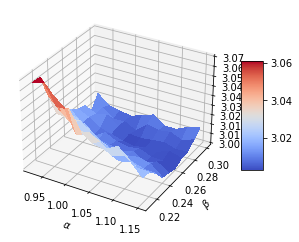

In [5]:
#Here starts the main program with variable declarations
NumberParticles = 2
Dimension = 2
MaxVariations = 10
Energies = np.zeros((MaxVariations,MaxVariations))
AlphaValues = np.zeros(MaxVariations)
BetaValues = np.zeros(MaxVariations)
(Energies, AlphaValues, BetaValues) = MonteCarloSampling()
outfile.close()
# Prepare for plots
fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
X, Y = np.meshgrid(AlphaValues, BetaValues)
surf = ax.plot_surface(X, Y, Energies,cmap=cm.coolwarm,linewidth=0, antialiased=False)
# Customize the z axis.
zmin = np.matrix(Energies).min()
zmax = np.matrix(Energies).max()
ax.set_zlim(zmin, zmax)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_zlabel(r'$\langle E \rangle$')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
save_fig("QdotImportance")
plt.show()

## Importance sampling, program elements in C++
The full code is [this link](https://github.com/CompPhysics/ComputationalPhysics2/tree/gh-pages/doc/pub/vmc/programs/c%2B%2B). Here we include only the parts pertaining to the computation of the quantum force and the Metropolis update. The program is a modfication of our previous c++ program discussed previously. Here we display only the part from the *vmcsolver.cpp*  file.  Note the usage of the function *GaussianDeviate*.

        void VMCSolver::runMonteCarloIntegration()
        {
          rOld = zeros<mat>(nParticles, nDimensions);
          rNew = zeros<mat>(nParticles, nDimensions);
          QForceOld = zeros<mat>(nParticles, nDimensions);
          QForceNew = zeros<mat>(nParticles, nDimensions);
        
          double waveFunctionOld = 0;
          double waveFunctionNew = 0;
        
          double energySum = 0;
          double energySquaredSum = 0;
        
          double deltaE;
        
          // initial trial positions
          for(int i = 0; i < nParticles; i++) {
            for(int j = 0; j < nDimensions; j++) {
              rOld(i,j) = GaussianDeviate(&idum)*sqrt(timestep);
            }
          }
          rNew = rOld;


## Importance sampling, program elements

          for(int cycle = 0; cycle < nCycles; cycle++) {
        
            // Store the current value of the wave function
            waveFunctionOld = waveFunction(rOld);
            QuantumForce(rOld, QForceOld); QForceOld = QForceOld*h/waveFunctionOld;
            // New position to test
            for(int i = 0; i < nParticles; i++) {
              for(int j = 0; j < nDimensions; j++) {
        	rNew(i,j) = rOld(i,j) + GaussianDeviate(&idum)*sqrt(timestep)+QForceOld(i,j)*timestep*D;
              }
              //  for the other particles we need to set the position to the old position since
              //  we move only one particle at the time
              for (int k = 0; k < nParticles; k++) {
        	if ( k != i) {
        	  for (int j=0; j < nDimensions; j++) {
        	    rNew(k,j) = rOld(k,j);
        	  }
        	} 
              }


## Importance sampling, program elements

          // loop over Monte Carlo cycles
              // Recalculate the value of the wave function and the quantum force
              waveFunctionNew = waveFunction(rNew);
              QuantumForce(rNew,QForceNew) = QForceNew*h/waveFunctionNew;
              //  we compute the log of the ratio of the greens functions to be used in the 
              //  Metropolis-Hastings algorithm
              GreensFunction = 0.0;            
              for (int j=0; j < nDimensions; j++) {
        	GreensFunction += 0.5*(QForceOld(i,j)+QForceNew(i,j))*
        	  (D*timestep*0.5*(QForceOld(i,j)-QForceNew(i,j))-rNew(i,j)+rOld(i,j));
              }
              GreensFunction = exp(GreensFunction);
        
              // The Metropolis test is performed by moving one particle at the time
              if(ran2(&idum) <= GreensFunction*(waveFunctionNew*waveFunctionNew) / (waveFunctionOld*waveFunctionOld)) {
        	for(int j = 0; j < nDimensions; j++) {
        	  rOld(i,j) = rNew(i,j);
        	  QForceOld(i,j) = QForceNew(i,j);
        	  waveFunctionOld = waveFunctionNew;
        	}
              } else {
        	for(int j = 0; j < nDimensions; j++) {
        	  rNew(i,j) = rOld(i,j);
        	  QForceNew(i,j) = QForceOld(i,j);
        	}
              }


## Importance sampling, program elements
**Note numerical derivatives.**

        double VMCSolver::QuantumForce(const mat &r, mat &QForce)
        {
            mat rPlus = zeros<mat>(nParticles, nDimensions);
            mat rMinus = zeros<mat>(nParticles, nDimensions);
            rPlus = rMinus = r;
            double waveFunctionMinus = 0;
            double waveFunctionPlus = 0;
            double waveFunctionCurrent = waveFunction(r);
        
            // Kinetic energy
        
            double kineticEnergy = 0;
            for(int i = 0; i < nParticles; i++) {
                for(int j = 0; j < nDimensions; j++) {
                    rPlus(i,j) += h;
                    rMinus(i,j) -= h;
                    waveFunctionMinus = waveFunction(rMinus);
                    waveFunctionPlus = waveFunction(rPlus);
                    QForce(i,j) =  (waveFunctionPlus-waveFunctionMinus);
                    rPlus(i,j) = r(i,j);
                    rMinus(i,j) = r(i,j);
                }
            }
        }


## Importance sampling, program elements
The general derivative formula of the Jastrow factor is (the subscript $C$ stands for Correlation)

$$
\frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_k} =
\sum_{i=1}^{k-1}\frac{\partial g_{ik}}{\partial x_k}
+
\sum_{i=k+1}^{N}\frac{\partial g_{ki}}{\partial x_k}
$$

However, 
with our written in way which can be reused later as

$$
\Psi_C=\prod_{i< j}g(r_{ij})= \exp{\left\{\sum_{i<j}f(r_{ij})\right\}},
$$

the gradient needed for the quantum force and local energy is easy to compute.  
The function $f(r_{ij})$ will depends on the system under study. In the equations below we will keep this general form.

## Importance sampling, program elements
In the Metropolis/Hasting algorithm, the *acceptance ratio* determines the probability for a particle  to be accepted at a new position. The ratio of the trial wave functions evaluated at the new and current positions is given by ($OB$ for the onebody  part)

$$
R \equiv \frac{\Psi_{T}^{new}}{\Psi_{T}^{old}} = 
\frac{\Psi_{OB}^{new}}{\Psi_{OB}^{old}}\frac{\Psi_{C}^{new}}{\Psi_{C}^{old}}
$$

Here $\Psi_{OB}$ is our onebody part (Slater determinant or product of boson single-particle states)  while $\Psi_{C}$ is our correlation function, or Jastrow factor. 
We need to optimize the $\nabla \Psi_T / \Psi_T$ ratio and the second derivative as well, that is
the $\mathbf{\nabla}^2 \Psi_T/\Psi_T$ ratio. The first is needed when we compute the so-called quantum force in importance sampling.
The second is needed when we compute the kinetic energy term of the local energy.

$$
\frac{\mathbf{\mathbf{\nabla}}  \Psi}{\Psi}  = \frac{\mathbf{\nabla}  (\Psi_{OB} \, \Psi_{C})}{\Psi_{OB} \, \Psi_{C}}  =  \frac{ \Psi_C \mathbf{\nabla}  \Psi_{OB} + \Psi_{OB} \mathbf{\nabla}  \Psi_{C}}{\Psi_{OB} \Psi_{C}} = \frac{\mathbf{\nabla}  \Psi_{OB}}{\Psi_{OB}} + \frac{\mathbf{\nabla}   \Psi_C}{ \Psi_C}
$$

## Importance sampling
The expectation value of the kinetic energy expressed in atomic units for electron $i$ is

$$
\langle \hat{K}_i \rangle = -\frac{1}{2}\frac{\langle\Psi|\mathbf{\nabla}_{i}^2|\Psi \rangle}{\langle\Psi|\Psi \rangle},
$$

$$
\hat{K}_i = -\frac{1}{2}\frac{\mathbf{\nabla}_{i}^{2} \Psi}{\Psi}.
$$

## Importance sampling
The second derivative which enters the definition of the local energy is

$$
\frac{\mathbf{\nabla}^2 \Psi}{\Psi}=\frac{\mathbf{\nabla}^2 \Psi_{OB}}{\Psi_{OB}} + \frac{\mathbf{\nabla}^2  \Psi_C}{ \Psi_C} + 2 \frac{\mathbf{\nabla}  \Psi_{OB}}{\Psi_{OB}}\cdot\frac{\mathbf{\nabla}   \Psi_C}{ \Psi_C}
$$

We discuss here how to calculate these quantities in an optimal way,

## Importance sampling
We have defined the correlated function as

$$
\Psi_C=\prod_{i< j}g(r_{ij})=\prod_{i< j}^Ng(r_{ij})= \prod_{i=1}^N\prod_{j=i+1}^Ng(r_{ij}),
$$

with 
$r_{ij}=|\mathbf{r}_i-\mathbf{r}_j|=\sqrt{(x_i-x_j)^2+(y_i-y_j)^2+(z_i-z_j)^2}$ in three dimensions or
$r_{ij}=|\mathbf{r}_i-\mathbf{r}_j|=\sqrt{(x_i-x_j)^2+(y_i-y_j)^2}$ if we work with two-dimensional systems.

In our particular case we have

$$
\Psi_C=\prod_{i< j}g(r_{ij})=\exp{\left\{\sum_{i<j}f(r_{ij})\right\}}.
$$

## Importance sampling
The total number of different relative distances $r_{ij}$ is $N(N-1)/2$. In a matrix storage format, the relative distances  form a strictly upper triangular matrix

$$
\mathbf{r} \equiv \begin{pmatrix}
  0 & r_{1,2} & r_{1,3} & \cdots & r_{1,N} \\
  \vdots & 0       & r_{2,3} & \cdots & r_{2,N} \\
  \vdots & \vdots  & 0  & \ddots & \vdots  \\
  \vdots & \vdots  & \vdots  & \ddots  & r_{N-1,N} \\
  0 & 0  & 0  & \cdots  & 0
 \end{pmatrix}.
$$

This applies to  $\mathbf{g} = \mathbf{g}(r_{ij})$ as well. 

In our algorithm we will move one particle  at the time, say the $kth$-particle.  This sampling will be seen to be particularly efficient when we are going to compute a Slater determinant.

## Importance sampling
We have that the ratio between Jastrow factors $R_C$ is given by

$$
R_{C} = \frac{\Psi_{C}^\mathrm{new}}{\Psi_{C}^\mathrm{cur}} =
\prod_{i=1}^{k-1}\frac{g_{ik}^\mathrm{new}}{g_{ik}^\mathrm{cur}}
\prod_{i=k+1}^{N}\frac{ g_{ki}^\mathrm{new}} {g_{ki}^\mathrm{cur}}.
$$

For the Pade-Jastrow form

$$
R_{C} = \frac{\Psi_{C}^\mathrm{new}}{\Psi_{C}^\mathrm{cur}} = 
\frac{\exp{U_{new}}}{\exp{U_{cur}}} = \exp{\Delta U},
$$

where

$$
\Delta U =
\sum_{i=1}^{k-1}\big(f_{ik}^\mathrm{new}-f_{ik}^\mathrm{cur}\big)
+
\sum_{i=k+1}^{N}\big(f_{ki}^\mathrm{new}-f_{ki}^\mathrm{cur}\big)
$$

## Importance sampling
One needs to develop a special algorithm 
that runs only through the elements of the upper triangular
matrix $\mathbf{g}$ and have $k$ as an index. 

The expression to be derived in the following is of interest when computing the quantum force and the kinetic energy. It has the form

$$
\frac{\mathbf{\nabla}_i\Psi_C}{\Psi_C} = \frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_i},
$$

for all dimensions and with $i$ running over all particles.

## Importance sampling
For the first derivative only $N-1$ terms survive the ratio because the $g$-terms that are not differentiated cancel with their corresponding ones in the denominator. Then,

$$
\frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_k} =
\sum_{i=1}^{k-1}\frac{1}{g_{ik}}\frac{\partial g_{ik}}{\partial x_k}
+
\sum_{i=k+1}^{N}\frac{1}{g_{ki}}\frac{\partial g_{ki}}{\partial x_k}.
$$

An equivalent equation is obtained for the exponential form after replacing $g_{ij}$ by $\exp(f_{ij})$, yielding:

$$
\frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_k} =
\sum_{i=1}^{k-1}\frac{\partial g_{ik}}{\partial x_k}
+
\sum_{i=k+1}^{N}\frac{\partial g_{ki}}{\partial x_k},
$$

with both expressions scaling as $\mathcal{O}(N)$.

## Importance sampling

Using the identity

$$
\frac{\partial}{\partial x_i}g_{ij} = -\frac{\partial}{\partial x_j}g_{ij},
$$

we get expressions where all the derivatives acting on the particle  are represented by the *second* index of $g$:

$$
\frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_k} =
\sum_{i=1}^{k-1}\frac{1}{g_{ik}}\frac{\partial g_{ik}}{\partial x_k}
-\sum_{i=k+1}^{N}\frac{1}{g_{ki}}\frac{\partial g_{ki}}{\partial x_i},
$$

and for the exponential case:

$$
\frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_k} =
\sum_{i=1}^{k-1}\frac{\partial g_{ik}}{\partial x_k}
-\sum_{i=k+1}^{N}\frac{\partial g_{ki}}{\partial x_i}.
$$

## Importance sampling
For correlation forms depending only on the scalar distances $r_{ij}$ we can use the chain rule. Noting that

$$
\frac{\partial g_{ij}}{\partial x_j} = \frac{\partial g_{ij}}{\partial r_{ij}} \frac{\partial r_{ij}}{\partial x_j} = \frac{x_j - x_i}{r_{ij}} \frac{\partial g_{ij}}{\partial r_{ij}},
$$

we arrive at

$$
\frac{1}{\Psi_C}\frac{\partial \Psi_C}{\partial x_k} = 
\sum_{i=1}^{k-1}\frac{1}{g_{ik}} \frac{\mathbf{r_{ik}}}{r_{ik}} \frac{\partial g_{ik}}{\partial r_{ik}}
-\sum_{i=k+1}^{N}\frac{1}{g_{ki}}\frac{\mathbf{r_{ki}}}{r_{ki}}\frac{\partial g_{ki}}{\partial r_{ki}}.
$$

## Importance sampling
Note that for the Pade-Jastrow form we can set $g_{ij} \equiv g(r_{ij}) = e^{f(r_{ij})} = e^{f_{ij}}$ and

$$
\frac{\partial g_{ij}}{\partial r_{ij}} = g_{ij} \frac{\partial f_{ij}}{\partial r_{ij}}.
$$

Therefore,

$$
\frac{1}{\Psi_{C}}\frac{\partial \Psi_{C}}{\partial x_k} =
\sum_{i=1}^{k-1}\frac{\mathbf{r_{ik}}}{r_{ik}}\frac{\partial f_{ik}}{\partial r_{ik}}
-\sum_{i=k+1}^{N}\frac{\mathbf{r_{ki}}}{r_{ki}}\frac{\partial f_{ki}}{\partial r_{ki}},
$$

where

$$
\mathbf{r}_{ij} = |\mathbf{r}_j - \mathbf{r}_i| = (x_j - x_i)\mathbf{e}_1 + (y_j - y_i)\mathbf{e}_2 + (z_j - z_i)\mathbf{e}_3
$$

is the relative distance.

## Importance sampling
The second derivative of the Jastrow factor divided by the Jastrow factor (the way it enters the kinetic energy) is

$$
\left[\frac{\mathbf{\nabla}^2 \Psi_C}{\Psi_C}\right]_x =\  
2\sum_{k=1}^{N}
\sum_{i=1}^{k-1}\frac{\partial^2 g_{ik}}{\partial x_k^2}\ +\ 
\sum_{k=1}^N
\left(
\sum_{i=1}^{k-1}\frac{\partial g_{ik}}{\partial x_k} -
\sum_{i=k+1}^{N}\frac{\partial g_{ki}}{\partial x_i}
\right)^2
$$

## Importance sampling
But we have a simple form for the function, namely

$$
\Psi_{C}=\prod_{i< j}\exp{f(r_{ij})},
$$

and it is easy to see that for particle  $k$
we have

$$
\frac{\mathbf{\nabla}^2_k \Psi_C}{\Psi_C }=
\sum_{ij\ne k}\frac{(\mathbf{r}_k-\mathbf{r}_i)(\mathbf{r}_k-\mathbf{r}_j)}{r_{ki}r_{kj}}f'(r_{ki})f'(r_{kj})+
\sum_{j\ne k}\left( f''(r_{kj})+\frac{2}{r_{kj}}f'(r_{kj})\right)
$$

## Use the [C++ random class for random number generations](http://www.cplusplus.com/reference/random/)

         // Initialize the seed and call the Mersienne algo
          std::random_device rd;
          std::mt19937_64 gen(rd());
          // Set up the uniform distribution for x \in [[0, 1]
          std::uniform_real_distribution<double> UniformNumberGenerator(0.0,1.0);
          std::normal_distribution<double> Normaldistribution(0.0,1.0);
        


## Use the C++ random class for RNGs, the Mersenne twister class
**Finding the new position for importance sampling**

         for (int cycles = 1; cycles <= NumberMCsamples; cycles++){ 
            // new position 
            for (int i = 0; i < NumberParticles; i++) { 
              for (int j = 0; j < Dimension; j++) {
                // gaussian deviate to compute new positions using a given timestep
                NewPosition(i,j) = OldPosition(i,j) + Normaldistribution(gen)*sqrt(timestep)+OldQuantumForce(i,j)*timestep*D;
        
              }  


## Use the C++ random class for RNGs, the Metropolis test
**Using the uniform distribution for the Metropolis test**

              //  Metropolis-Hastings algorithm
              double GreensFunction = 0.0;            
              for (int j = 0; j < Dimension; j++) {
                GreensFunction += 0.5*(OldQuantumForce(i,j)+NewQuantumForce(i,j))*
                  (D*timestep*0.5*(OldQuantumForce(i,j)-NewQuantumForce(i,j))-NewPosition(i,j)+OldPosition(i,j));
              }
              GreensFunction = exp(GreensFunction);
              // The Metropolis test is performed by moving one particle at the time
              if(UniformNumberGenerator(gen) <= GreensFunction*NewWaveFunction*NewWaveFunction/OldWaveFunction/OldWaveFunction ) { 
                for (int  j = 0; j < Dimension; j++) {
                  OldPosition(i,j) = NewPosition(i,j);
                  OldQuantumForce(i,j) = NewQuantumForce(i,j);
                }
                OldWaveFunction = NewWaveFunction;
              }


## Importance sampling, Fokker-Planck and Langevin equations
A stochastic process is simply a function of two variables, one is the time,
the other is a stochastic variable $X$, defined by specifying
* the set $\left\{x\right\}$ of possible values for $X$;

* the probability distribution, $w_X(x)$,  over this set, or briefly $w(x)$

The set of values $\left\{x\right\}$ for $X$ 
may be discrete, or continuous. If the set of
values is continuous, then $w_X (x)$ is a probability density so that 
$w_X (x)dx$
is the probability that one finds the stochastic variable $X$ to have values
in the range $[x, x + dx]$ .

## Importance sampling, Fokker-Planck and Langevin equations
     An arbitrary number of other stochastic variables may be derived from
$X$. For example, any $Y$ given by a mapping of $X$, is also a stochastic
variable. The mapping may also be time-dependent, that is, the mapping
depends on an additional variable $t$

$$
Y_X (t) = f (X, t) .
$$

The quantity $Y_X (t)$ is called a random function, or, since $t$ often is time,
a stochastic process. A stochastic process is a function of two variables,
one is the time, the other is a stochastic variable $X$. Let $x$ be one of the
possible values of $X$ then

$$
y(t) = f (x, t),
$$

is a function of $t$, called a sample function or realization of the process.
In physics one considers the stochastic process to be an ensemble of such
sample functions.

## Importance sampling, Fokker-Planck and Langevin equations
     For many physical systems initial distributions of a stochastic 
variable $y$ tend to equilibrium distributions: $w(y, t)\rightarrow w_0(y)$ 
as $t\rightarrow\infty$. In
equilibrium detailed balance constrains the transition rates

$$
W(y\rightarrow y')w(y ) = W(y'\rightarrow y)w_0 (y),
$$

where $W(y'\rightarrow y)$ 
is the probability, per unit time, that the system changes
from a state $|y\rangle$ , characterized by the value $y$ 
for the stochastic variable $Y$ , to a state $|y'\rangle$.

Note that for a system in equilibrium the transition rate 
$W(y'\rightarrow y)$ and
the reverse $W(y\rightarrow y')$ may be very different.

## Importance sampling, Fokker-Planck and Langevin equations
Consider, for instance, a simple
system that has only two energy levels $\epsilon_0 = 0$ and 
$\epsilon_1 = \Delta E$. 

For a system governed by the Boltzmann distribution we find (the partition function has been taken out)

$$
W(0\rightarrow 1)\exp{-(\epsilon_0/kT)} = W(1\rightarrow 0)\exp{-(\epsilon_1/kT)}
$$

We get then

$$
\frac{W(1\rightarrow 0)}{W(0 \rightarrow 1)}=\exp{-(\Delta E/kT)},
$$

which goes to zero when $T$ tends to zero.

## Importance sampling, Fokker-Planck and Langevin equations
If we assume a discrete set of events,
our initial probability
distribution function can be  given by

$$
w_i(0) = \delta_{i,0},
$$

and its time-development after a given time step $\Delta t=\epsilon$ is

$$
w_i(t) = \sum_{j}W(j\rightarrow i)w_j(t=0).
$$

The continuous analog to $w_i(0)$ is

$$
w(\mathbf{x})\rightarrow \delta(\mathbf{x}),
$$

where we now have generalized the one-dimensional position $x$ to a generic-dimensional  
vector $\mathbf{x}$. The Kroenecker $\delta$ function is replaced by the $\delta$ distribution
function $\delta(\mathbf{x})$ at  $t=0$.

## Importance sampling, Fokker-Planck and Langevin equations
The transition from a state $j$ to a state $i$ is now replaced by a transition
to a state with position $\mathbf{y}$ from a state with position $\mathbf{x}$. 
The discrete sum of transition probabilities can then be replaced by an integral
and we obtain the new distribution at a time $t+\Delta t$ as

$$
w(\mathbf{y},t+\Delta t)= \int W(\mathbf{y},t+\Delta t| \mathbf{x},t)w(\mathbf{x},t)d\mathbf{x},
$$

and after $m$ time steps we have

$$
w(\mathbf{y},t+m\Delta t)= \int W(\mathbf{y},t+m\Delta t| \mathbf{x},t)w(\mathbf{x},t)d\mathbf{x}.
$$

When equilibrium is reached we have

$$
w(\mathbf{y})= \int W(\mathbf{y}|\mathbf{x}, t)w(\mathbf{x})d\mathbf{x},
$$

that is no time-dependence. Note our change of notation for $W$

## Importance sampling, Fokker-Planck and Langevin equations
We can solve the equation for $w(\mathbf{y},t)$ by making a Fourier transform to
momentum space. 
The PDF $w(\mathbf{x},t)$ is related to its Fourier transform
$\tilde{w}(\mathbf{k},t)$ through

$$
w(\mathbf{x},t) = \int_{-\infty}^{\infty}d\mathbf{k} \exp{(i\mathbf{kx})}\tilde{w}(\mathbf{k},t),
$$

and using the definition of the 
$\delta$-function

$$
\delta(\mathbf{x}) = \frac{1}{2\pi} \int_{-\infty}^{\infty}d\mathbf{k} \exp{(i\mathbf{kx})},
$$

we see that

$$
\tilde{w}(\mathbf{k},0)=1/2\pi.
$$

## Importance sampling, Fokker-Planck and Langevin equations
We can then use the Fourier-transformed diffusion equation

$$
\frac{\partial \tilde{w}(\mathbf{k},t)}{\partial t} = -D\mathbf{k}^2\tilde{w}(\mathbf{k},t),
$$

with the obvious solution

$$
\tilde{w}(\mathbf{k},t)=\tilde{w}(\mathbf{k},0)\exp{\left[-(D\mathbf{k}^2t)\right)}=
    \frac{1}{2\pi}\exp{\left[-(D\mathbf{k}^2t)\right]}.
$$

## Importance sampling, Fokker-Planck and Langevin equations
With the Fourier transform we obtain

$$
w(\mathbf{x},t)=\int_{-\infty}^{\infty}d\mathbf{k} \exp{\left[i\mathbf{kx}\right]}\frac{1}{2\pi}\exp{\left[-(D\mathbf{k}^2t)\right]}=
    \frac{1}{\sqrt{4\pi Dt}}\exp{\left[-(\mathbf{x}^2/4Dt)\right]},
$$

with the normalization condition

$$
\int_{-\infty}^{\infty}w(\mathbf{x},t)d\mathbf{x}=1.
$$

## Importance sampling, Fokker-Planck and Langevin equations
The solution represents the probability of finding
our random walker at position $\mathbf{x}$ at time $t$ if the initial distribution 
was placed at $\mathbf{x}=0$ at $t=0$. 

There is another interesting feature worth observing. The discrete transition probability $W$
itself is given by a binomial distribution.
The results from the central limit theorem state that 
transition probability in the limit $n\rightarrow \infty$ converges to the normal 
distribution. It is then possible to show that

$$
W(il-jl,n\epsilon)\rightarrow W(\mathbf{y},t+\Delta t|\mathbf{x},t)=
    \frac{1}{\sqrt{4\pi D\Delta t}}\exp{\left[-((\mathbf{y}-\mathbf{x})^2/4D\Delta t)\right]},
$$

and that it satisfies the normalization condition and is itself a solution
to the diffusion equation.

## Importance sampling, Fokker-Planck and Langevin equations
Let us now assume that we have three PDFs for times $t_0 < t' < t$, that is
$w(\mathbf{x}_0,t_0)$, $w(\mathbf{x}',t')$ and $w(\mathbf{x},t)$.
We have then

$$
w(\mathbf{x},t)= \int_{-\infty}^{\infty} W(\mathbf{x}.t|\mathbf{x}'.t')w(\mathbf{x}',t')d\mathbf{x}',
$$

and

$$
w(\mathbf{x},t)= \int_{-\infty}^{\infty} W(\mathbf{x}.t|\mathbf{x}_0.t_0)w(\mathbf{x}_0,t_0)d\mathbf{x}_0,
$$

and

$$
w(\mathbf{x}',t')= \int_{-\infty}^{\infty} W(\mathbf{x}'.t'|\mathbf{x}_0,t_0)w(\mathbf{x}_0,t_0)d\mathbf{x}_0.
$$

## Importance sampling, Fokker-Planck and Langevin equations
We can combine these equations and arrive at the famous Einstein-Smoluchenski-Kolmogorov-Chapman (ESKC) relation

$$
W(\mathbf{x}t|\mathbf{x}_0t_0)  = \int_{-\infty}^{\infty} W(\mathbf{x},t|\mathbf{x}',t')W(\mathbf{x}',t'|\mathbf{x}_0,t_0)d\mathbf{x}'.
$$

We can replace the spatial dependence with a dependence upon say the velocity
(or momentum), that is we have

$$
W(\mathbf{v},t|\mathbf{v}_0,t_0)  = \int_{-\infty}^{\infty} W(\mathbf{v},t|\mathbf{v}',t')W(\mathbf{v}',t'|\mathbf{v}_0,t_0)d\mathbf{x}'.
$$

## Importance sampling, Fokker-Planck and Langevin equations
We will now derive the Fokker-Planck equation. 
We start from the ESKC equation

$$
W(\mathbf{x},t|\mathbf{x}_0,t_0)  = \int_{-\infty}^{\infty} W(\mathbf{x},t|\mathbf{x}',t')W(\mathbf{x}',t'|\mathbf{x}_0,t_0)d\mathbf{x}'.
$$

Define $s=t'-t_0$, $\tau=t-t'$ and $t-t_0=s+\tau$. We have then

$$
W(\mathbf{x},s+\tau|\mathbf{x}_0)  = \int_{-\infty}^{\infty} W(\mathbf{x},\tau|\mathbf{x}')W(\mathbf{x}',s|\mathbf{x}_0)d\mathbf{x}'.
$$

## Importance sampling, Fokker-Planck and Langevin equations
Assume now that $\tau$ is very small so that we can make an expansion in terms of a small step $xi$, with $\mathbf{x}'=\mathbf{x}-\xi$, that is

$$
W(\mathbf{x},s|\mathbf{x}_0)+\frac{\partial W}{\partial s}\tau +O(\tau^2) = \int_{-\infty}^{\infty} W(\mathbf{x},\tau|\mathbf{x}-\xi)W(\mathbf{x}-\xi,s|\mathbf{x}_0)d\mathbf{x}'.
$$

We assume that $W(\mathbf{x},\tau|\mathbf{x}-\xi)$ takes non-negligible values only when $\xi$ is small. This is just another way of stating the Master equation!!

## Importance sampling, Fokker-Planck and Langevin equations
We say thus that $\mathbf{x}$ changes only by a small amount in the time interval $\tau$. 
This means that we can make a Taylor expansion in terms of $\xi$, that is we
expand

$$
W(\mathbf{x},\tau|\mathbf{x}-\xi)W(\mathbf{x}-\xi,s|\mathbf{x}_0) =
\sum_{n=0}^{\infty}\frac{(-\xi)^n}{n!}\frac{\partial^n}{\partial x^n}\left[W(\mathbf{x}+\xi,\tau|\mathbf{x})W(\mathbf{x},s|\mathbf{x}_0)
\right].
$$

## Importance sampling, Fokker-Planck and Langevin equations
We can then rewrite the ESKC equation as

$$
\frac{\partial W}{\partial s}\tau=-W(\mathbf{x},s|\mathbf{x}_0)+
\sum_{n=0}^{\infty}\frac{(-\xi)^n}{n!}\frac{\partial^n}{\partial x^n}
\left[W(\mathbf{x},s|\mathbf{x}_0)\int_{-\infty}^{\infty} \xi^nW(\mathbf{x}+\xi,\tau|\mathbf{x})d\xi\right].
$$

We have neglected higher powers of $\tau$ and have used that for $n=0$ 
we get simply $W(\mathbf{x},s|\mathbf{x}_0)$ due to normalization.

## Importance sampling, Fokker-Planck and Langevin equations
We say thus that $\mathbf{x}$ changes only by a small amount in the time interval $\tau$. 
This means that we can make a Taylor expansion in terms of $\xi$, that is we
expand

$$
W(\mathbf{x},\tau|\mathbf{x}-\xi)W(\mathbf{x}-\xi,s|\mathbf{x}_0) =
\sum_{n=0}^{\infty}\frac{(-\xi)^n}{n!}\frac{\partial^n}{\partial x^n}\left[W(\mathbf{x}+\xi,\tau|\mathbf{x})W(\mathbf{x},s|\mathbf{x}_0)
\right].
$$

## Importance sampling, Fokker-Planck and Langevin equations
We can then rewrite the ESKC equation as

$$
\frac{\partial W(\mathbf{x},s|\mathbf{x}_0)}{\partial s}\tau=-W(\mathbf{x},s|\mathbf{x}_0)+
\sum_{n=0}^{\infty}\frac{(-\xi)^n}{n!}\frac{\partial^n}{\partial x^n}
\left[W(\mathbf{x},s|\mathbf{x}_0)\int_{-\infty}^{\infty} \xi^nW(\mathbf{x}+\xi,\tau|\mathbf{x})d\xi\right].
$$

We have neglected higher powers of $\tau$ and have used that for $n=0$ 
we get simply $W(\mathbf{x},s|\mathbf{x}_0)$ due to normalization.

## Importance sampling, Fokker-Planck and Langevin equations
We simplify the above by introducing the moments

$$
M_n=\frac{1}{\tau}\int_{-\infty}^{\infty} \xi^nW(\mathbf{x}+\xi,\tau|\mathbf{x})d\xi=
\frac{\langle [\Delta x(\tau)]^n\rangle}{\tau},
$$

resulting in

$$
\frac{\partial W(\mathbf{x},s|\mathbf{x}_0)}{\partial s}=
\sum_{n=1}^{\infty}\frac{(-\xi)^n}{n!}\frac{\partial^n}{\partial x^n}
\left[W(\mathbf{x},s|\mathbf{x}_0)M_n\right].
$$

## Importance sampling, Fokker-Planck and Langevin equations
When $\tau \rightarrow 0$ we assume that $\langle [\Delta x(\tau)]^n\rangle \rightarrow 0$ more rapidly than $\tau$ itself if $n > 2$. 
When $\tau$ is much larger than the standard correlation time of 
system then $M_n$ for $n > 2$ can normally be neglected.
This means that fluctuations become negligible at large time scales.

If we neglect such terms we can rewrite the ESKC equation as

$$
\frac{\partial W(\mathbf{x},s|\mathbf{x}_0)}{\partial s}=
-\frac{\partial M_1W(\mathbf{x},s|\mathbf{x}_0)}{\partial x}+
\frac{1}{2}\frac{\partial^2 M_2W(\mathbf{x},s|\mathbf{x}_0)}{\partial x^2}.
$$

## Importance sampling, Fokker-Planck and Langevin equations
In a more compact form we have

$$
\frac{\partial W}{\partial s}=
-\frac{\partial M_1W}{\partial x}+
\frac{1}{2}\frac{\partial^2 M_2W}{\partial x^2},
$$

which is the Fokker-Planck equation!  It is trivial to replace 
position with velocity (momentum).

## Importance sampling, Fokker-Planck and Langevin equations
**Langevin equation.**

Consider a particle  suspended in a liquid. On its path through the liquid it will continuously collide with the liquid molecules. Because on average the particle  will collide more often on the front side than on the back side, it will experience a systematic force proportional with its velocity, and directed opposite to its velocity. Besides this systematic force the particle  will experience a stochastic force  $\mathbf{F}(t)$. 
The equations of motion are 
* $\frac{d\mathbf{r}}{dt}=\mathbf{v}$ and 

* $\frac{d\mathbf{v}}{dt}=-\xi \mathbf{v}+\mathbf{F}$.

## Importance sampling, Fokker-Planck and Langevin equations
**Langevin equation.**

From hydrodynamics  we know that the friction constant  $\xi$ is given by

$$
\xi =6\pi \eta a/m
$$

where $\eta$ is the viscosity  of the solvent and a is the radius of the particle .

Solving the second equation in the previous slide we get

$$
\mathbf{v}(t)=\mathbf{v}_{0}e^{-\xi t}+\int_{0}^{t}d\tau e^{-\xi (t-\tau )}\mathbf{F }(\tau ).
$$

## Importance sampling, Fokker-Planck and Langevin equations
**Langevin equation.**

If we want to get some useful information out of this, we have to average over all possible realizations of 
$\mathbf{F}(t)$, with the initial velocity as a condition. A useful quantity for example is

$$
\langle \mathbf{v}(t)\cdot \mathbf{v}(t)\rangle_{\mathbf{v}_{0}}=v_{0}^{-\xi 2t}
+2\int_{0}^{t}d\tau e^{-\xi (2t-\tau)}\mathbf{v}_{0}\cdot \langle \mathbf{F}(\tau )\rangle_{\mathbf{v}_{0}}
$$

$$
+\int_{0}^{t}d\tau ^{\prime }\int_{0}^{t}d\tau e^{-\xi (2t-\tau -\tau ^{\prime })}
\langle \mathbf{F}(\tau )\cdot \mathbf{F}(\tau ^{\prime })\rangle_{ \mathbf{v}_{0}}.
$$

## Importance sampling, Fokker-Planck and Langevin equations
**Langevin equation.**

In order to continue we have to make some assumptions about the conditional averages of the stochastic forces. 
In view of the chaotic character of the stochastic forces the following 
assumptions seem to be appropriate

$$
\langle \mathbf{F}(t)\rangle=0,
$$

and

$$
\langle \mathbf{F}(t)\cdot \mathbf{F}(t^{\prime })\rangle_{\mathbf{v}_{0}}=  C_{\mathbf{v}_{0}}\delta (t-t^{\prime }).
$$

We omit the subscript $\mathbf{v}_{0}$, when the quantity of interest turns out to be independent of $\mathbf{v}_{0}$. Using the last three equations we get

$$
\langle \mathbf{v}(t)\cdot \mathbf{v}(t)\rangle_{\mathbf{v}_{0}}=v_{0}^{2}e^{-2\xi t}+\frac{C_{\mathbf{v}_{0}}}{2\xi }(1-e^{-2\xi t}).
$$

For large t this should be equal to 3kT/m, from which it follows that

$$
\langle \mathbf{F}(t)\cdot \mathbf{F}(t^{\prime })\rangle =6\frac{kT}{m}\xi \delta (t-t^{\prime }).
$$

This result is called the fluctuation-dissipation theorem .

## Importance sampling, Fokker-Planck and Langevin equations
**Langevin equation.**

Integrating

$$
\mathbf{v}(t)=\mathbf{v}_{0}e^{-\xi t}+\int_{0}^{t}d\tau e^{-\xi (t-\tau )}\mathbf{F }(\tau ),
$$

we get

$$
\mathbf{r}(t)=\mathbf{r}_{0}+\mathbf{v}_{0}\frac{1}{\xi }(1-e^{-\xi t})+
\int_0^td\tau \int_0^{\tau}\tau ^{\prime } e^{-\xi (\tau -\tau ^{\prime })}\mathbf{F}(\tau ^{\prime }),
$$

from which we calculate the mean square displacement

$$
\langle ( \mathbf{r}(t)-\mathbf{r}_{0})^{2}\rangle _{\mathbf{v}_{0}}=\frac{v_0^2}{\xi}(1-e^{-\xi t})^{2}+\frac{3kT}{m\xi ^{2}}(2\xi t-3+4e^{-\xi t}-e^{-2\xi t}).
$$

## Importance sampling, Fokker-Planck and Langevin equations
**Langevin equation.**

For very large $t$ this becomes

$$
\langle (\mathbf{r}(t)-\mathbf{r}_{0})^{2}\rangle =\frac{6kT}{m\xi }t
$$

from which we get the Einstein relation

$$
D= \frac{kT}{m\xi }
$$

where we have used $\langle (\mathbf{r}(t)-\mathbf{r}_{0})^{2}\rangle =6Dt$.